<h1> Restaurant Maintenance Analysis </h1>

<h4> This is an analysis on the maintenance chart provided in the Overly Involved Guide to Cooking. The purpose of this analysis is too look at the overall expected gain your party should receive when rolling on the chart. I wrote some code to run some simulations and balance it, so I thought I would include that and show my reasoning. </h4>

In [1]:
#Basic library imports, matplotlib is for generating our graphs and numpy is for some stats methods
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#These are simply analogs for the chart that I put up for calculating maintenance costs
profits = {1:-2,15:-1.5,30:-1,40:-.5,50:0,70:1,90:2,99:3,100:5}
breakpoints = [1,15,30,40,50,70,90,99,100]

In [18]:
def rollMaintenance(profits,breakpoints,bonus=0):
    roll = random.randint(1,100)
    #print("rolled a ", roll)
    roll = max(min((roll + bonus),100),1)
    for point in breakpoints:
        if(roll <= point):
            return(profits[point])

In [10]:
def calculateAverageMaintenance(numDays, profits, breakpoints, baseMaintenance=1, bonus=0):
    totalProfit = 0
    for x in range(numDays):
        totalProfit += (baseMaintenance * rollMaintenance(profits, breakpoints,bonus))
        #print("new daily maintenance: ", totalProfit)
    return totalProfit / numDays

<h3>runSims() can be given a custom number of days to simulate for, and a custom amount of base maintenance cost. For the 
purpose of the tests I ran, I used a week long stretch, and then used a base maintenance of one gold to calculate the average proportion of profit.</h3>

In [11]:
def runSims(numTrials, profits, breakpoints, numDays=7, baseMaintenance=1,bonus=0):
    profitResults = []
    numPositive = 0
    numNegative = 0
    for x in range(numTrials):
        trial = calculateAverageMaintenance(numDays, profits, breakpoints, baseMaintenance, bonus)
        profitResults.append(trial)
        if(trial > 0):
            numPositive += 1
        else:
            numNegative += 1
    return (profitResults,numPositive/numTrials,numNegative/numTrials)

In [12]:
def getCounts(profitResults,returnList=True):
    resultVals = list(set(profitResults))
    resultCounts = [profitResults.count(val) for val in resultVals]
    if(returnList):
        return(resultVals,resultCounts)
    else:
        return {resultVals[i]:resultCounts[i] for i in range(len(resultVals))}

Percent Positive:  0.7751
Percent Negative:  0.2249
Standard Deviation:  0.5859876071337052
Mean:  0.4912428571428571


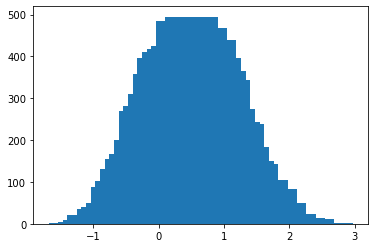

In [7]:
results,percentPositive,percentNegative = runSims(10000,profits,breakpoints)
print("Percent Positive: ",percentPositive)
print("Percent Negative: ", percentNegative)
print("Standard Deviation: ", np.std(results))
print("Mean: ", np.mean(results))

(resultVals,resultCounts) = getCounts(results)
plt.bar(resultVals,resultCounts)
plt.show()

<h1>10,000 simulations, one week, maintenace cost of 1</h1>
<h2>This is my base simulation case, as I expect most rolls to be done one week at a time, and my players like rolling dice. I also will upload this calculator onto my website for you to automate these rolls if you wish</h2>

<h4>We can see from these simulations that the spread will give an average profit of 0.5 for every 1 maintenance cost. These profits are per day so feel free to multiply this by whatever maintenance cost is assumed for the restaurant. For example, at the base maintenance cost of 5 gold per day, this would assume a revenue of 7.5 gold per day, or rather, a profit of 2.5 gold per day.</h4>

<h4> This is about the amount I was aiming for. Keeping in mind that the base cost of buying a restaurant is 2000 gold, this means that a party will break even on their investment in about 800 days, or a little over 2 years. I find this reasonable, but I do also advise for any restaurant campaign to include long stretches of downtime for roleplaying, and also just jumpung between major events.</h4>

<h4> However, just looking at the average doesn't do much for the player experience. People don't like losing money, and I did my best to skew that in the favor of the players, while still offering the risk for losses. This spread offers a standard deviation of .58, meaning, approximately 68% of the time, the party should end up with between -.09 and 1.07 in profit, which I find to be a reasonable spread. Truly punishing losses still occur, but are much rare than general gains. Furthermore, I charted the general amount of positive and negative results. The negative results also include any time a 0 is rolled, and comes out to about 22% of the time. This means that almost 80% of the time your players roll for a week, they'll be in the money. I believe this is a good balance, and prevents the negative results from being so common that your players get demotivated, while keeping them common enough that you can work them into story beats. You can explain the reason for the loss, then give your players a bonus on the next roll as a reward for being good owners and dealing with it. I recommend being generous with temporary bonuses for rolls, as they give a nice little boost without completely unbalancing any systems as those bonuses are used up.</h4>

<h4>As a matter of fact, let's take a look at how those bonuses affect these calculations.</h4>

Percent Positive:  0.804
Percent Negative:  0.196
Standard Deviation:  0.5990361857490203
Mean:  0.5567714285714286


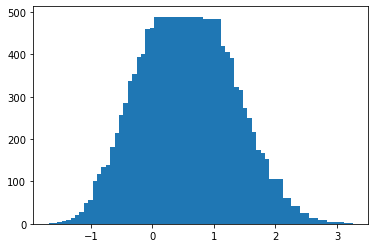

In [24]:
results,percentPositive,percentNegative = runSims(10000,profits,breakpoints,bonus=1)
print("Percent Positive: ",percentPositive)
print("Percent Negative: ", percentNegative)
print("Standard Deviation: ", np.std(results))
print("Mean: ", np.mean(results))

(resultVals,resultCounts) = getCounts(results)
plt.bar(resultVals,resultCounts)
plt.show()

<h4>A bonus of just 1 to each of those rolls over a week brings our mean up from .49 to .55 and our positive roll percentage is now over 80%</h4>

Percent Positive:  0.8493
Percent Negative:  0.1507
Standard Deviation:  0.6287076141026227
Mean:  0.6814642857142857


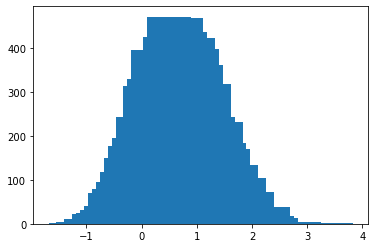

In [25]:
results,percentPositive,percentNegative = runSims(10000,profits,breakpoints,bonus=3)
print("Percent Positive: ",percentPositive)
print("Percent Negative: ", percentNegative)
print("Standard Deviation: ", np.std(results))
print("Mean: ", np.mean(results))

(resultVals,resultCounts) = getCounts(results)
plt.bar(resultVals,resultCounts)
plt.show()

<h4>A bonus of 3 to each roll gives a mean of .68 profit, and our percent positive is up to around 85%</h4>

Percent Positive:  0.8814
Percent Negative:  0.1186
Standard Deviation:  0.65701896188429
Mean:  0.8130642857142857


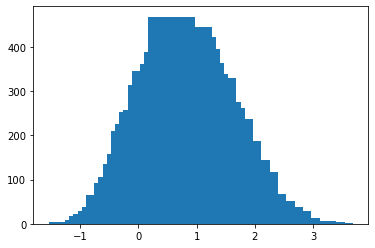

In [26]:
results,percentPositive,percentNegative = runSims(10000,profits,breakpoints,bonus=5)
print("Percent Positive: ",percentPositive)
print("Percent Negative: ", percentNegative)
print("Standard Deviation: ", np.std(results))
print("Mean: ", np.mean(results))

(resultVals,resultCounts) = getCounts(results)
plt.bar(resultVals,resultCounts)
plt.show()

<h4>A bonus of 5 to each roll brings us up to .81 mean profit, and a percent positive of 88%</h4>

Percent Positive:  0.949
Percent Negative:  0.051
Standard Deviation:  0.7145432677092209
Mean:  1.1478428571428572


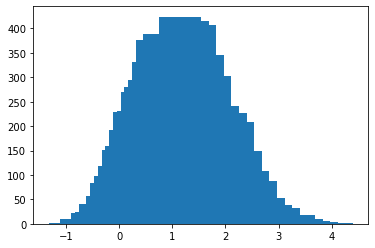

In [27]:
results,percentPositive,percentNegative = runSims(10000,profits,breakpoints,bonus=10)
print("Percent Positive: ",percentPositive)
print("Percent Negative: ", percentNegative)
print("Standard Deviation: ", np.std(results))
print("Mean: ", np.mean(results))

(resultVals,resultCounts) = getCounts(results)
plt.bar(resultVals,resultCounts)
plt.show()

<h4>And a bonus of 10 gives us a mean profit of 1.14 and a whopping 95% positive rolls.
This system is very much designed with the idea of plenty of bonuses being given out. A good bonus can make up for losses from a previous week of low rolls, and it is a good tool for keeping your players accountable for their own restaurant. 
On the other hand, feel free to give out penalties to rolls for lack of management. We've already seen how impactful positive modifiers are to these rolls, it definitely works the other way too.    
Feel free to tweak the code above to see what different average results different bonuses give. Refer to the "Bonuses" subsection of "Maintenance Costs" in the Overly Involved Guide to Cooking for my advice on when to grant different bonuses.<h4>

<h1>In the long run</h1>

<h3>To close, lets also run a simulation of how these calculations occur over longer periods of time</h3>

<h1>30 days</h1>
<h4>We can see the power of the positive skew over the long run. It becomes less and less likely for your players to be in the red the more days are rolled for. 

Percent Positive:  0.9998
Percent Negative:  0.0002
Standard Deviation:  0.346629801625596
Mean:  1.1419083333333333


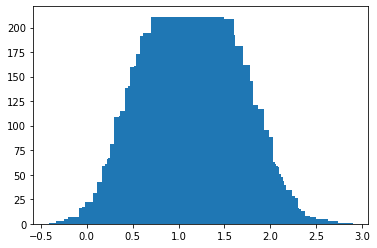

In [29]:
results,percentPositive,percentNegative = runSims(10000,profits,breakpoints,numDays=30,bonus=10)
print("Percent Positive: ",percentPositive)
print("Percent Negative: ", percentNegative)
print("Standard Deviation: ", np.std(results))
print("Mean: ", np.mean(results))

(resultVals,resultCounts) = getCounts(results)
plt.bar(resultVals,resultCounts)
plt.show()

<h1>90 Days</h1>

Percent Positive:  1.0
Percent Negative:  0.0
Standard Deviation:  0.20024962643574223
Mean:  1.146298888888889


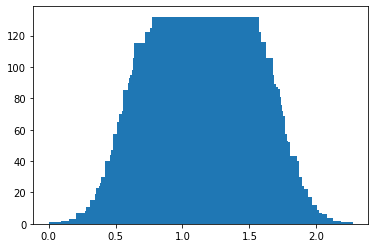

In [30]:
results,percentPositive,percentNegative = runSims(10000,profits,breakpoints,numDays=90,bonus=10)
print("Percent Positive: ",percentPositive)
print("Percent Negative: ", percentNegative)
print("Standard Deviation: ", np.std(results))
print("Mean: ", np.mean(results))

(resultVals,resultCounts) = getCounts(results)
plt.bar(resultVals,resultCounts)
plt.show()

<h1>1 year</h1>

Percent Positive:  1.0
Percent Negative:  0.0
Standard Deviation:  0.09803476848467907
Mean:  1.145053287671233


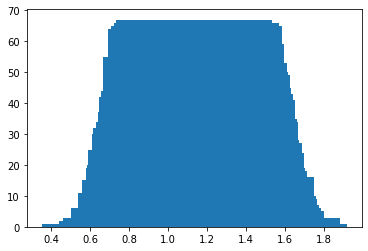

In [32]:
results,percentPositive,percentNegative = runSims(10000,profits,breakpoints,numDays=365,bonus=10)
print("Percent Positive: ",percentPositive)
print("Percent Negative: ", percentNegative)
print("Standard Deviation: ", np.std(results))
print("Mean: ", np.mean(results))

(resultVals,resultCounts) = getCounts(results)
plt.bar(resultVals,resultCounts)
plt.show()

<h3>Over the long run, we can see that the mean profit normalizes to about 1.14. As always, feel free to adjust that table to be more or less rewarding depending on how you would like to manage the economy of your game. Let me know if you have any thoughts or if I made any glaring oversights in these analyses. I probably did.</h3>